## EDA and preprocessing notebook
in this notebook the dataset CIFAR-10 is loaded and explored also some preprocessing is used to ready data for training.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!mkdir -p /content/drive/MyDrive/cifar10_project/data

In [3]:
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10
import seaborn as sns

# 1. Load and Explore CIFAR-10 and Show Sample Images

In [4]:
(X_train_full, y_train_full), (X_test, y_test) = cifar10.load_data()

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


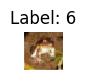

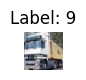

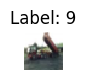

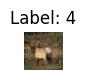

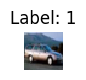

In [5]:
print(X_train_full.shape, y_train_full.shape)
print(X_test.shape, y_test.shape)

for i in range(5):
    plt.figure(figsize=(0.5, 0.5))
    plt.imshow(X_train_full[i], interpolation="nearest")
    plt.axis("off")
    plt.title(f"Label: {y_train_full[i][0]}")
    plt.show()

## 2. Train/Validation Split

In [6]:
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)

(45000, 32, 32, 3) (45000, 1)
(5000, 32, 32, 3) (5000, 1)


## 3. Normalizing images

In [7]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

## 4. Distribution of each class in train set

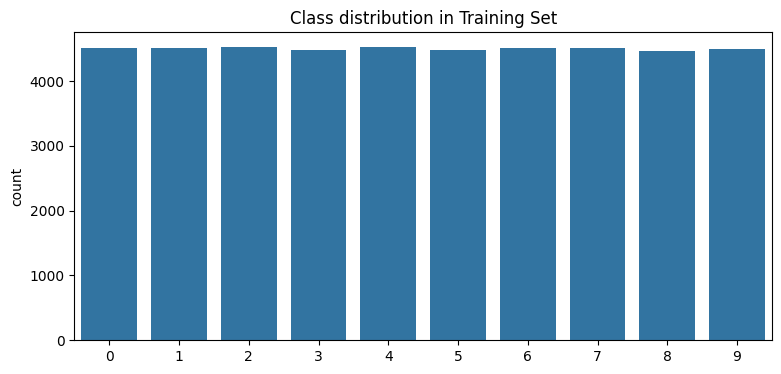

In [8]:
plt.figure(figsize=(9,4))
sns.countplot(x=y_train.flatten())
plt.title("Class distribution in Training Set")
plt.show()

## 5. Checking mean and std of channels

In [9]:
print("Train set mean:", np.mean(X_train, axis=(0,1,2)))
print("Train set std:", np.std(X_train, axis=(0,1,2)))

Train set mean: [0.49154913 0.4821251  0.44642678]
Train set std: [0.24715214 0.24367544 0.26173454]


## 6. Showing some samples from each class

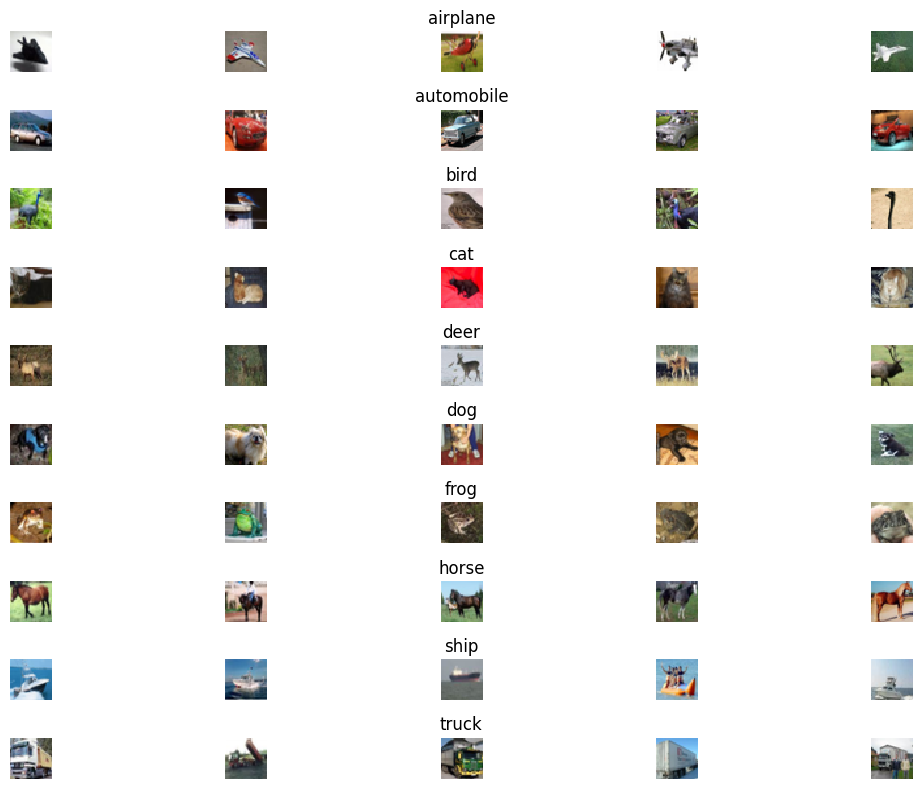

In [10]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(12,8))
for class_id in range(10):
    idx = np.where(y_train.flatten() == class_id)[0]
    for i in range(5):
        plt.subplot(10,5,class_id*5 + i + 1)
        plt.imshow(X_train[idx[i]], interpolation="nearest")
        plt.axis("off")
        if i == 2:
            plt.title(class_names[class_id])
plt.tight_layout()
plt.show()

## 7.Checking if normalization is workiing correctly and standard data values per channels

In [11]:
print("Min pixel value:", X_train.min())
print("Max pixel value:", X_train.max())

Min pixel value: 0.0
Max pixel value: 1.0


In [12]:
channel_means = X_train.mean(axis=(0,1,2))
channel_stds = X_train.std(axis=(0,1,2))

X_train = (X_train - channel_means) / channel_stds
X_valid = (X_valid - channel_means) / channel_stds
X_test = (X_test - channel_means) / channel_stds

## 8. Creating a simple data augmentation layer.

In [13]:
data_augmentation = keras.Sequential([
    keras.layers.RandomFlip("horizontal"),
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomZoom(0.1),
])

## 9. Save results for training.

In [14]:
np.save("/content/drive/MyDrive/cifar10_project/data/X_train.npy", X_train)
np.save("/content/drive/MyDrive/cifar10_project/data/y_train.npy", y_train)
np.save("/content/drive/MyDrive/cifar10_project/data/X_valid.npy", X_valid)
np.save("/content/drive/MyDrive/cifar10_project/data/y_valid.npy", y_valid)
np.save("/content/drive/MyDrive/cifar10_project/data/X_test.npy", X_test)
np.save("/content/drive/MyDrive/cifar10_project/data/y_test.npy", y_test)